In [1]:
import os
import numpy as np
#import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def load_images(path):
    #ath = 'orl_faces'
    X = []
    y = []
    for i in range(40):
        for j in range(10):
            img = Image.open(os.path.join(path,'s'+str(i+1), str(j+1)+'.pgm'))
            X.append(np.asarray(img, dtype=np.uint8).flatten())
            y.append(i)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [3]:
path = "C:/Users/lucas/Desktop/Projeto Final IA/orl_faces"
X, Y = load_images(path)


print(X.shape, Y.shape)

(400, 10304) (400,)


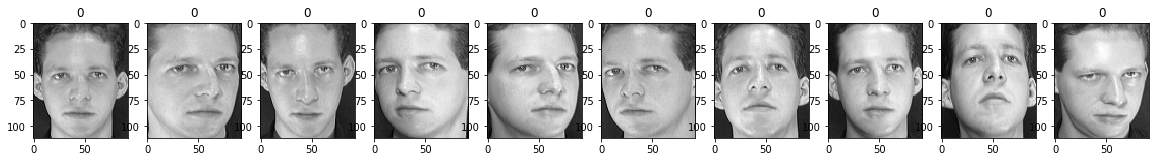

In [4]:
X, Y = load_images(path)
plt.figure(figsize=(20,15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

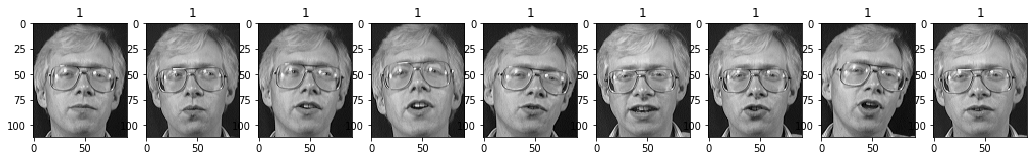

In [5]:
plt.figure(figsize=(40,30))
for i in range(11, 20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

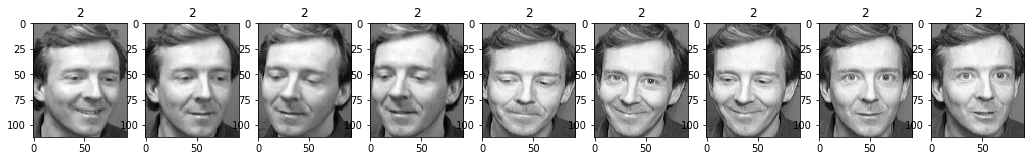

In [6]:
plt.figure(figsize=(60,45))
for i in range(21, 30):
    plt.subplot(1, 30, i+1)
    plt.imshow(X[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

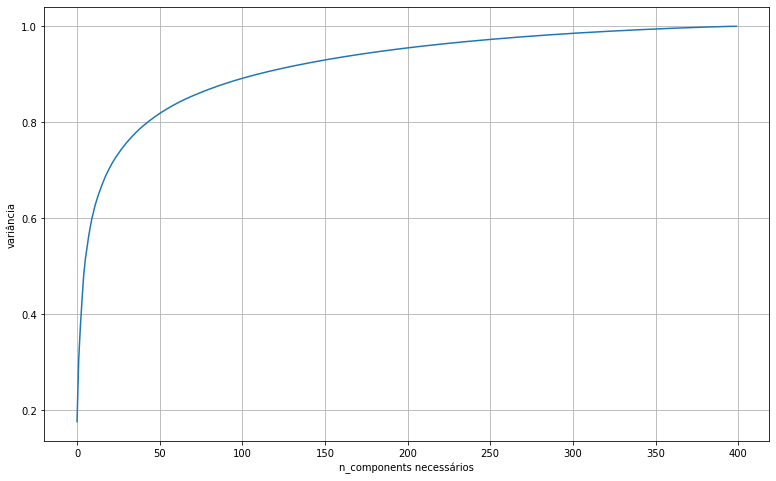

In [7]:
pca = PCA(svd_solver='randomized',n_components=400)
pca.fit(X)
plt.figure(figsize=(13,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('n_components necessários')
plt.ylabel('variância');

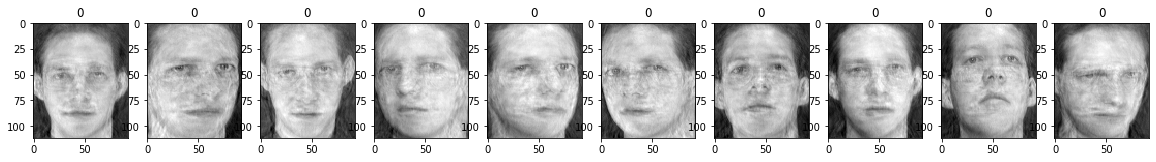

In [8]:
pca = PCA(150).fit(X)
cp = pca.transform(X)
eigenfaces = pca.inverse_transform(cp)
plt.figure(figsize=(20,15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(eigenfaces[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

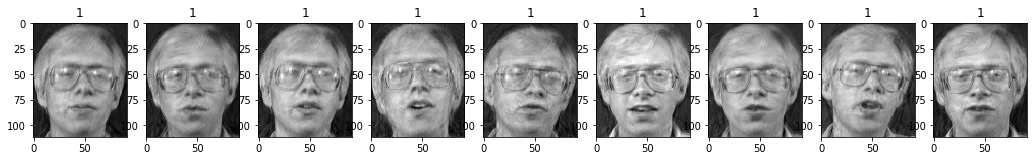

In [9]:
plt.figure(figsize=(40,30))
for i in range(11, 20):
    plt.subplot(1, 20, i+1)
    plt.imshow(eigenfaces[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

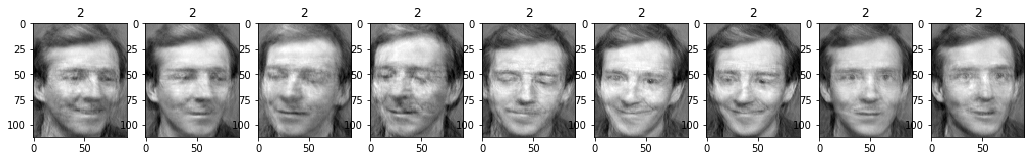

In [10]:
plt.figure(figsize=(60,45))
for i in range(21, 30):
    plt.subplot(1, 30, i+1)
    plt.imshow(eigenfaces[i].reshape(112, 92), cmap='binary_r',label="")
    plt.title(Y[i])
    plt.axis('on')   
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(eigenfaces, Y, test_size = 0.2, random_state = 0,stratify=Y)
svc = SVC(C=100,kernel='rbf', class_weight='balanced', gamma=0.00000001)
model = make_pipeline(pca, svc)
pred = model.fit(X_train,y_train)
face_pred = model.predict(X_test)
svm_score = model.score(X_test,y_test)

print(svm_score)

0.975


In [12]:
print(svm_score)

0.975


In [13]:
print(face_pred)

[ 7 10 11 39  8 15 23 11 27 20  7  2  3  8 31 32  0 29 33  6  2 18  5 26
 39 28 21 34 30 28 22 17 13  3 19 37  0  9 38 23 22 34 36 30 35 27 27  4
 36 15 38  9 12 25 12 17 35 31 29 16 19 15 16 20  6  5  1  4 33 24 26 13
 14 21 10 32 37  1 14 24]


In [14]:
print(classification_report(y_test,face_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

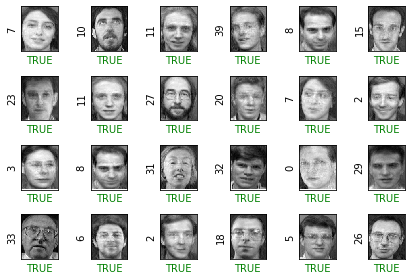

In [15]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(112, 92), cmap='binary_r')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(face_pred[i])
    if(face_pred[i] == y_test[i]):
        axi.set_xlabel("TRUE",color='green')
    else:
        axi.set_xlabel("FALSE",color='red')
plt.tight_layout()

In [16]:
print(confusion_matrix(y_test, face_pred, labels=range(400)))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
